# Crypto-currency Trade-in Analysis

This analysis is to identify when to trade or buy crytocurrencies and predicting when to either buy or trade. This dataset describes the price of crypto-currencies, volume and market captalisation on a daily basis from 1/1/2016 to 10/1/2020. The data can be found on [Kaggle](https://www.kaggle.com/georgezakharov/historical-data-on-the-trading-of-cryptocurrencies).

In [5]:
# Python Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import warnings


path = 'C:\\Users\\Jamie\\Desktop\\NN_Project\\Other projects'
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')

In [29]:
# Filter crypto data
file_loc = path + '\\Datasets\\crypto_tradinds.csv' # File location
file = pd.read_csv(file_loc)
file['trade_date'] = pd.to_datetime(file['trade_date'])
mask = (file['trade_date'] >= "2016-1-1") & (file['trade_date'] <= "2020-1-10") & (file['trade_date'] == "2016-1-1")
c = pd.DataFrame(file.loc[mask])
filter_types = pd.Series(list(c['crypto_name']))
types = long_types[pd.notna(long_types)]
data_filt = pd.DataFrame(file[file['crypto_name'].isin(types)])
data_filt.head() # Data that has the same range as bitcoin

,trade_date,volume,price_usd,price_btc,market_cap,capitalization_change_1_day,USD_price_change_1_day,BTC_price_change_1_day,crypto_name,crypto_type,ticker,max_supply,site_url,github_url,minable,platform_name,industry_name
0,2016-01-01,36278900.0,434.33,1.0,6.529300e+09,0.000000,0.000000,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)
1,2016-01-02,30096600.0,433.44,1.0,6.517390e+09,-0.001824,-0.002049,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)
2,2016-01-03,39633800.0,430.01,1.0,6.467430e+09,-0.007666,-0.007913,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)
3,2016-01-04,38477500.0,433.09,1.0,6.515713e+09,0.007466,0.007163,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)
4,2016-01-05,34522600.0,431.96,1.0,6.500393e+09,-0.002351,-0.002609,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)


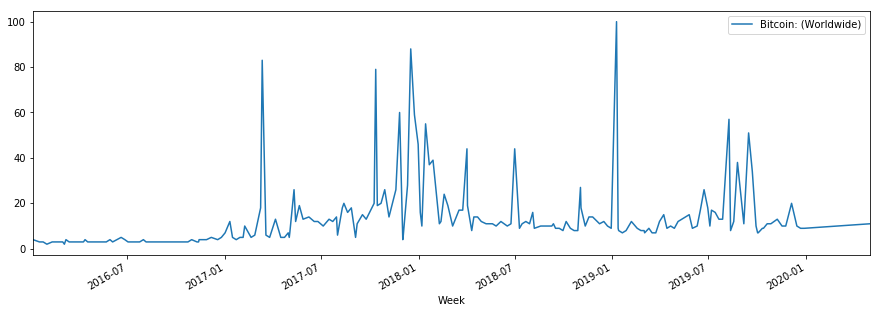

In [117]:
# Bitcoin Google searches
word_searches = path + "\\Data Analysis\\1. Crypto_trade-in\\multiTimeline.csv"
words = pd.read_csv(word_searches)
words.Week = pd.to_datetime(words.Week)
words.set_index('Week').plot(figsize=(15,5))
#words.head()


To identify the contribution of the ups and downs of bitcoin we need to explore diverse trends of unique variables. The analysis of the variables can range from both inside or outside the dataset inorder to gain a broad understanding of volatility of crypto-currencies.

The plots below show the trends of different crypto-currency prices (in USD) over time and as evidient there are individually influenced by unknown factors. However, the other [notable](https://en.wikipedia.org/wiki/List_of_cryptocurrencies) crypto-currencies such as Ethereum and XRP (Ripple) follows a similar trend to Bitcoin which could have similar varaible/s relating to the spike in price. 

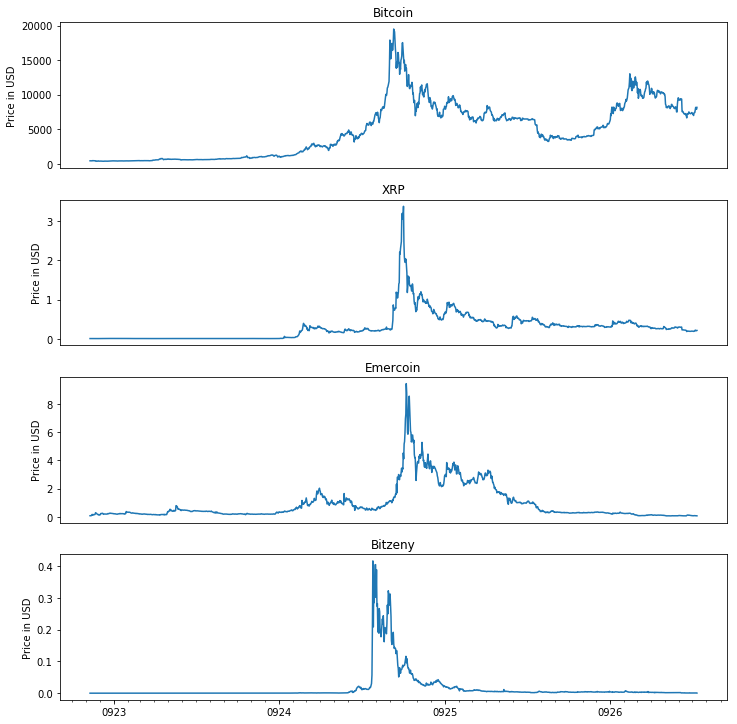

In [118]:
lgth_typ = len(types)
curr = [0, 2, 20, 100]

fig, ax = plt.subplots(len(curr),1, figsize=(10,10))
fig.tight_layout()
# The time is constant (x-axis)
for i in range(len(curr)):  
    ax[i].title.set_text(str(types[curr[i]]))
    ax[i].plot(data_filt[data_filt['crypto_name'] == types[curr[i]]]['price_usd'])
    ax[i].set_ylabel('Price in USD')
    ax[i].xaxis.set_major_locator(years)
    ax[i].xaxis.set_major_formatter(yearsFmt)
    ax[i].xaxis.set_minor_locator(months)
    ax[i].autoscale_view()